## init functions

In [1]:
def init_pycromanager():
    from pycromanager import Core, Studio
    core = Core()
    studio = Studio()
    core.set_timeout_ms(20000)
    return core, studio
core,studio = init_pycromanager()

In [4]:
import numpy as np

In [18]:
def snap_image(core, rgb=True, flip_channel=True,brightfield_processing_function=None, show_image= False):
    
    core.snap_image()
    tagged_image = core.get_tagged_image()
    if rgb == True:
        pixels = np.reshape(
            tagged_image.pix,
            newshape=[tagged_image.tags["Height"], tagged_image.tags["Width"], 4],
            )
        pixels = pixels[:, :, 0:3]
        if flip_channel:
            pixels = np.flip(pixels, 2)
        if brightfield_processing_function:
            pixels = brightfield_processing_function(pixels)
    else:
        pixels = np.reshape(
            tagged_image.pix,
            newshape=[tagged_image.tags["Height"], tagged_image.tags["Width"]],
            )
    
    if show_image:
        imshow(pixels)
    
    return pixels

In [7]:
from matplotlib.pyplot import *

In [8]:
%matplotlib qt
%matplotlib inline

## test snap image

In [6]:
image = snap_image(core)

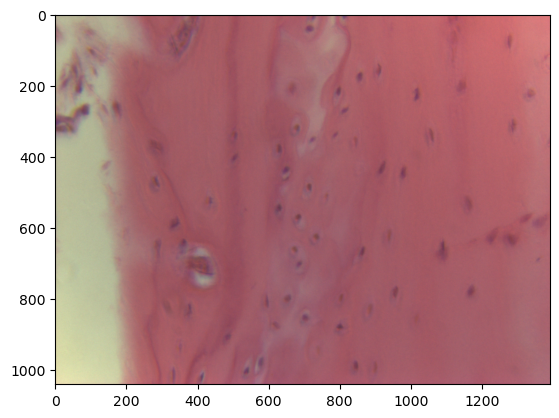

In [9]:
imshow(image)

## test z-stage

In [13]:
core.get_property('Core','Focus')

'ZStage:Z:32'

In [12]:
core.get_position()

-6915.339999999999

In [14]:
core.set_position(-6920.0)

In [15]:
core.get_position()

-6920.01

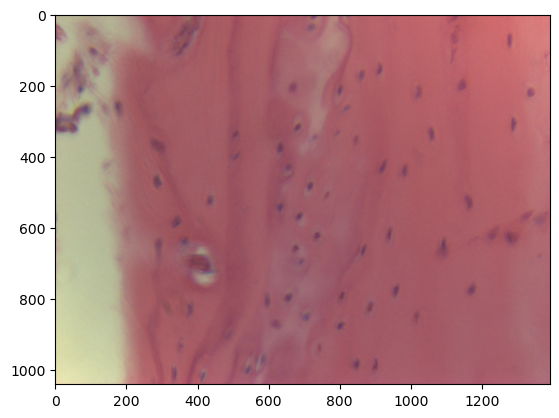

In [21]:
_= snap_image(core,show_image=True)

## autofocus

- #TODO: change the import by either PYTHONPATH or extending sys 
- https://stackoverflow.com/questions/4383571/importing-files-from-different-folder

In [26]:
import os
os.chdir(r'autofocus-tools-loci')

In [27]:
import autofocus_tools as af

In [28]:
image.shape

(1040, 1392, 3)

In [29]:
af.threshold_absolute_gradient(image.mean(2))

2318187.9999999995

## plot z-score

In [37]:
z_start = core.get_position()

In [38]:
core.get_focus_device()

'ZStage:Z:32'

In [39]:
core.set_position(z_start+5.0)

In [40]:
for k in range(-100,+110,20):
    print(k, z_start+k , core.get_position())

-100 -7020.01 -6915.01
-80 -7000.01 -6915.01
-60 -6980.01 -6915.01
-40 -6960.01 -6915.01
-20 -6940.01 -6915.01
0 -6920.01 -6915.01
20 -6900.01 -6915.01
40 -6880.01 -6915.01
60 -6860.01 -6915.01
80 -6840.01 -6915.01
100 -6820.01 -6915.01


-25 -6945.01
-22 -6942.01
-19 -6939.0199999999995
-16 -6936.0199999999995
-13 -6933.01
-10 -6930.01
-7 -6927.0199999999995
-4 -6924.0199999999995
-1 -6921.0199999999995
2 -6918.01
5 -6915.0199999999995
8 -6912.0199999999995
11 -6909.0199999999995
14 -6906.01
17 -6903.0199999999995
20 -6900.0199999999995
23 -6897.0199999999995


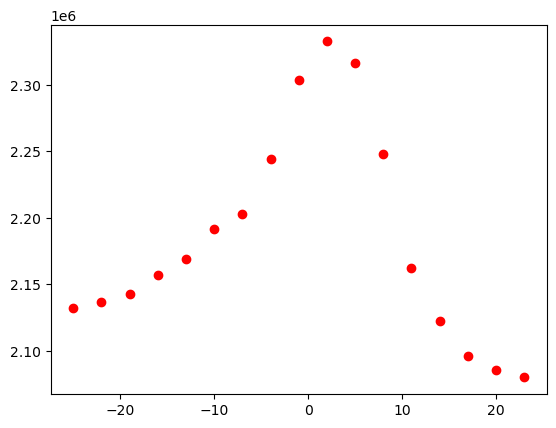

In [44]:
img_arr = []
for k in range(-25,+25,3):
    core.set_position(z_start+k)
    core.wait_for_device(core.get_focus_device())
    print(k,core.get_position())
    img_arr.append(snap_image(core,show_image=False))
    plot(k, af.threshold_absolute_gradient(img_arr[-1].mean(2)),'or')

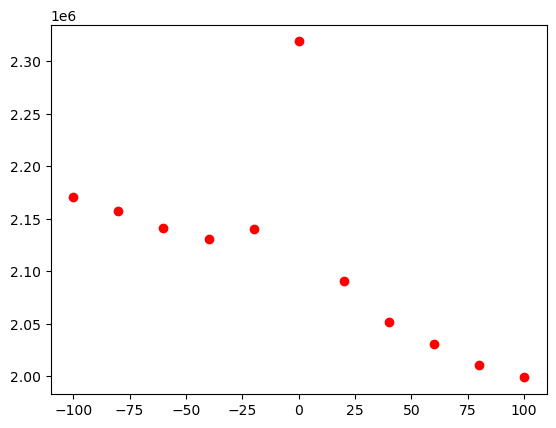

In [42]:
for ix,k in enumerate(range(-100,+110,20)):
    plot(k, af.threshold_absolute_gradient(img_arr[ix].mean(2)),'or')